# Support Vector Machines Part 1

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import svm
from sklearn import preprocessing

/Users/alisarupenyan/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
%config InlineBackend.figure_formats = ['svg']

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cmap= mpl.colors.ListedColormap(['red', 'black', 'blue'])

## Task 1 Decision Boundary from a Maximal Margin Classifier (6 points)
Let's create some synthetic data with two classes:

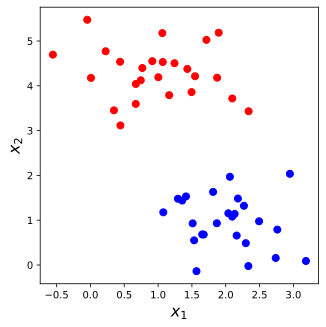

In [3]:
X, y = datasets.make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

y[np.where(y==0)] = -1

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

ax.set_xlabel(r'$x_1$', fontsize=16)
ax.set_ylabel(r'$x_2$', fontsize=16)

plt.show()

In this task we will use the `SVC` model of `sklearn.svm` with a `kernel=linear` and large parameter `C`. `sklearn`'s module `svm` has implementations of several Support Vector Machine algorithms. Some are meant to solve Regression, some - Classification problems. `LinearSVC` stands for Linear Support Vector Classification which is exactly what we need in order to solve the maximal margin classification problem. However, `svm.SVC` offers more flexibility in order to extract the learned parameters etc.

In [4]:
model = svm.SVC(kernel='linear', C=1000, tol=0.0001) # initialize the model
model.fit(X, y) # fit the model = learn the decision boundaries

SVC(C=1000, kernel='linear', tol=0.0001)

When the optimisation has completed, you can access the parameters of the separating hyperplane. The vector $\mathbf{w}$:

In [5]:
model.coef_

array([[ 0.2354745 , -1.41254898]])

The $b$:

In [6]:
model.intercept_

array([3.2961071])

The indices of the support vectors:

In [7]:
model.support_

array([18, 25,  7], dtype=int32)

So you can slice $\mathbf{X}$ for the corresponding coordinates

In [8]:
X[model.support_]

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

or get them directly:

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

**Task 1A** Calculate $y^{(m)}\left(b+w^Tx^{(m)}\right)$ for every support vector. Please explain whether the result complies with your expectation and why?

Report the calculated values and your explanation from Task 1A in Moodle.

**Task 1B** Calculate the distance from the decision boundary to the support vectors, i.e. the width of the margin

Report the width of the margin calculated in Task 1B.

**Task 1C** Generate a scatterplot with the data $X$, the decision boundary and the gutters like in
https://github.zhaw.ch/pages/doem/mldm_book/06_svm.html#fig-max-margin
using the optimised parameters `model.interecept_` and `model.coef_[0]`

## Task 2 Large Margin Classifier on the Wine Dataset (4 points)
This dataset `sklearn.datasets.load_wine()` contains the chemical analysis of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine's chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 3 classes. What accuracy can you reach?

In [ ]:
wine = datasets.load_wine(as_frame=True)
print(wine.DESCR)

**TASK 2A**: Train a linear SVM on the dataset and report the accuracy

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=42)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

SVC will automatically use the One-vs-All strategy, so there's nothing special we need to do to handle multiple classes.

In [ ]:
model = svm.SVC(kernel='linear', C=1000, tol=0.0001, random_state=42) # initialize the model
...

Calulate the accuracy (cross validation score):

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(...).mean()


Report the accuracy that you reached in task 2A without feature scaling in Moodle.

**Task 2B**: Which accuracy (cross validation score) can you reach when you standarize the features before training?  
See https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
cross_val_score(...).mean()

Report the accuracy that you reached with feature standaridsation in Task 2B.